# Problem 2: Superdense Coding (Bell State)

In [1]:
# Imports
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

## Part A: Qiskit Implementation
- Objective:
    - Demonstrate how two classical bits can be sent using one qubit and a shared Bell state.
- Qubit roles:
    - Qubit 0: Alice’s qubit
    - Qubit 1: Bob’s qubit

- Tasks:
1. Create a Bell pair shared between Alice and Bob.
2. Choose any particular 2-bit classical message (either 00, or 01, or 10, or 11)
3. Encode the message using a single-qubit gate on Alice’s qubit, based on the encoding rule
given below
4. Perform Bell-basis decoding.
5. Measure both qubits and plot a histogram.

- Encoding rule:
    - 00 → Identity
    - 01 → Z
    - 10 → X
    - 11 → X followed by Z

In [2]:
# Quantum and Classical registers
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(2, 'c')
qc = QuantumCircuit(qr, cr)

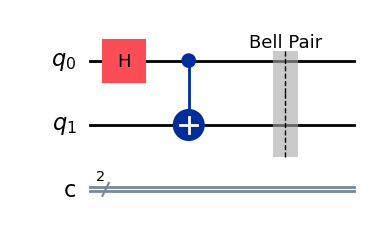

In [3]:
# STEP 1: Create Bell Pair
qc.h(0)           # Hadamard on Alice's qubit → superposition
qc.cx(0, 1)       # CNOT → entangle Alice and Bob's qubits

qc.barrier(label='Bell Pair')

# Draw the circuit
qc.draw('mpl')

In [4]:
# Step 2: Select 2-bit classical message
message = '11'

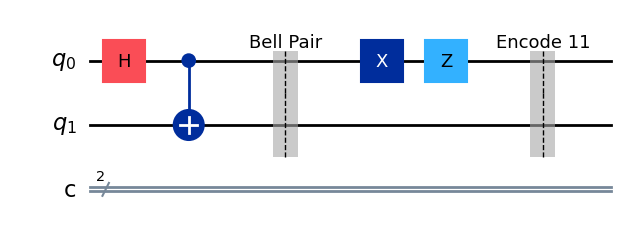

In [5]:
# STEP 3: Encode the message
qc.x(0)  # X first: (|00⟩ + |11⟩)/√2 → (|10⟩ + |01⟩)/√2
qc.z(0)  # Z second:(|10⟩ + |01⟩)/√2 → (|10⟩ - |01⟩)/√2 = |Ψ-⟩

qc.barrier(label=f'Encode {message}')

# Draw the circuit
qc.draw('mpl')

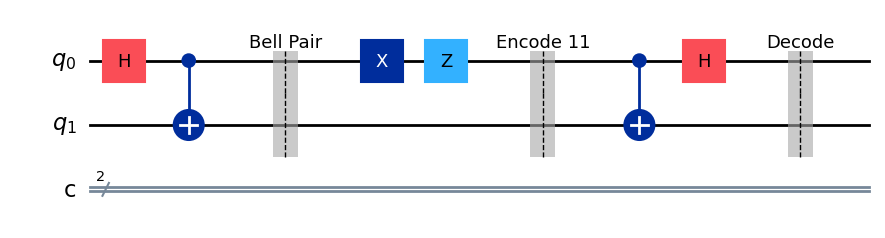

In [6]:
# STEP 4: Perform Bell-basis decoding
qc.cx(0, 1)       # CNOT
qc.h(0)           # Hadamard
qc.barrier(label='Decode')

# Draw the circuit
qc.draw('mpl')

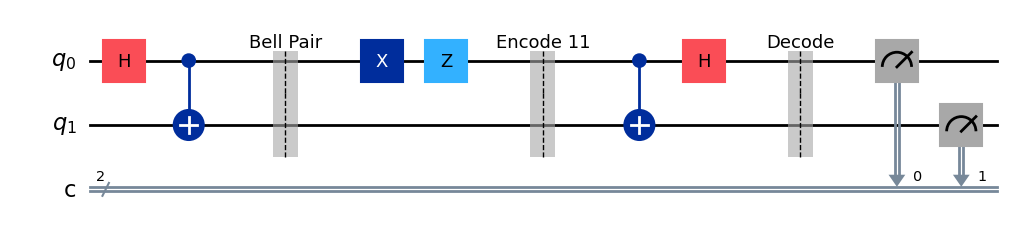

In [7]:
# STEP 5A: Measure both qubits

qc.measure([0, 1], [0, 1])

# Draw the circuit
qc.draw('mpl')

Message sent:     11
Measurement results: {'11': 5000}


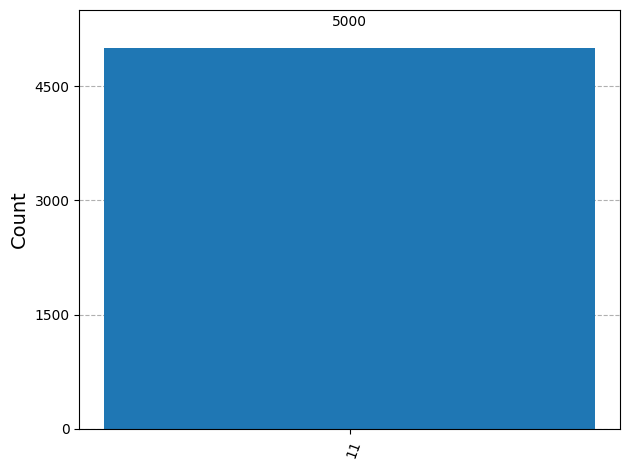

In [8]:
# Step 5B: Run Simulation and Plot Histogram
backend = Aer.get_backend('aer_simulator')
job = backend.run(qc, shots=5000)
result = job.result()
counts = result.get_counts()

print(f"Message sent:     {message}")
print(f"Measurement results: {counts}")

# Plot the histogram
plot_histogram(counts)

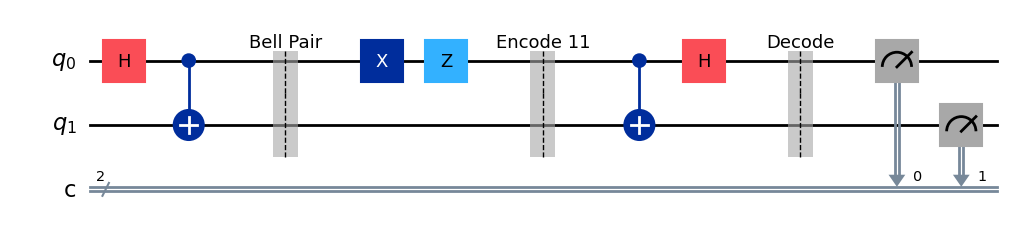

In [9]:
# Full Circuit Diagram
qc.draw('mpl')

## Part B: Conceptual Questions (2 marks)
---

1. Explain what happens if an eavesdropper intercepts the qubit sent from Alice to Bob?
- -> If an eavesdropper (Eve) intercepts the single qubit Alice sends to Bob, she **cannot extract any useful information** from it. Here's why:
    - Alice's qubit alone, without Bob's paired qubit, is in a **maximally mixed state** — it looks like pure noise, with equal probability of being |0⟩ or |1⟩ regardless of the encoded message. The information is **distributed across both qubits** through entanglement; neither qubit alone carries the message. Eve would need **both** Alice's qubit and Bob's qubit together to decode anything — and Bob never sends his qubit anywhere.
    - Furthermore, if Eve measures Alice's qubit, she **collapses the entangled state**, which disturbs the system and can be detected by Bob when his decoding produces wrong results.

2. Give one application or implication of superdense coding.
- -> **Quantum-secured communication channels** — Superdense coding allows doubling the classical information capacity of a quantum channel. In practice, this has implications for **quantum networks and quantum internet**, where bandwidth is limited and expensive. Instead of sending 2 physical qubits to communicate 2 classical bits, you send only 1 qubit (after pre-sharing entanglement), effectively halving the quantum channel usage. This is especially valuable in satellite-based quantum communication where transmitting qubits over long distances is costly and lossy.

#### Example
```text
             ALICE                          BOB
               │                             │
         holds q[0]                    holds q[1]
               │                             │
         ──────┴─────── ENTANGLED ───────────┘
               │
        Applies 1 gate        
        (encodes 2 bits)       
               │
        Sends q[0] ──────────────────────► Receives q[0]
                                                │
                                    Decodes using both qubits
                                    Measures → gets 2 bits
```